In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [62]:
#img=cv2.imread(r"C:\Users\richr\OneDrive\Documents\archive (1)\train\0\Training_3908.jpg")

In [5]:
img=cv2.imread(r"C:\Users\Sorabh  Singh\OneDrive\Desktop\Data Set\archive.zip\train\angry\Training_3908.jpg")

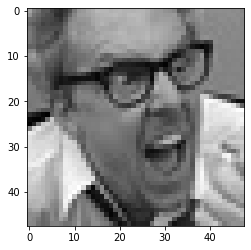

In [63]:
plt.imshow(img)


In [64]:
print(img)

[[[163 163 163]
  [128 128 128]
  [114 114 114]
  ...
  [139 139 139]
  [141 141 141]
  [134 134 134]]

 [[147 147 147]
  [114 114 114]
  [102 102 102]
  ...
  [142 142 142]
  [138 138 138]
  [138 138 138]]

 [[112 112 112]
  [106 106 106]
  [ 92  92  92]
  ...
  [140 140 140]
  [141 141 141]
  [134 134 134]]

 ...

 [[139 139 139]
  [141 141 141]
  [136 136 136]
  ...
  [154 154 154]
  [171 171 171]
  [191 191 191]]

 [[140 140 140]
  [133 133 133]
  [120 120 120]
  ...
  [138 138 138]
  [146 146 146]
  [158 158 158]]

 [[136 136 136]
  [134 134 134]
  [113 113 113]
  ...
  [146 146 146]
  [144 144 144]
  [144 144 144]]]


In [65]:
print(img.shape)

(48, 48, 3)


In [66]:
#Datadirectory=r"C:\Users\richr\OneDrive\Documents\archive (1)\train"

In [1]:
Datadirectory=r"C:\Users\Sorabh  Singh\OneDrive\Desktop\Data Set\archive.zip\train"

In [67]:
classes=["0","1","2","3","4","5","6"]

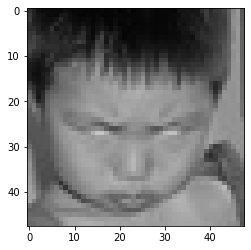

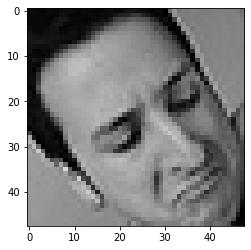

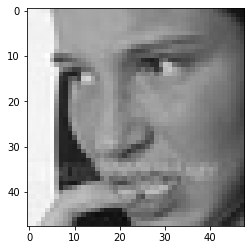

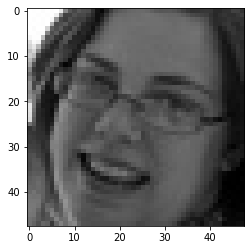

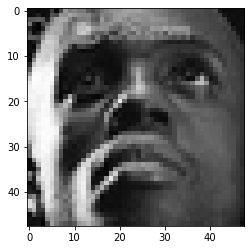

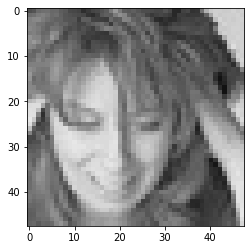

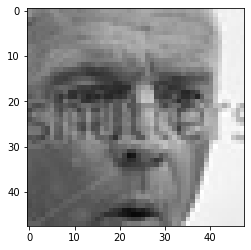

In [68]:
for category in classes :
    path=os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    

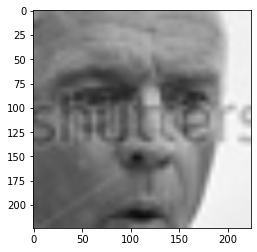

In [69]:
img_size= 224
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()


In [70]:
new_array.shape

(224, 224, 3)

In [71]:
training_data = []

def create_training_data():
    for category in classes :
        path=os.path.join(Datadirectory,category)
        class_num=classes.index(category)
        for img in os.listdir(path): 
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                print(e)

In [72]:
create_training_data()

In [73]:
len(training_data)

28709

In [74]:
temp=np.array(training_data)
temp.shape

C:\Users\richr\AppData\Local\Temp\ipykernel_15756\3747024421.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp=np.array(training_data)


(28709, 2)

In [75]:
import random

random.shuffle(training_data)

In [76]:
x = []
y = []

for features,labels in training_data:
    x.append(features)
    y.append(labels)
    
x=np.array(x).reshape(-1,img_size,img_size,3)
y=np.array(y)

In [77]:
x.shape

(28709, 224, 224, 3)

In [78]:
#x=np.linalg.norm(x)

In [79]:
#new=x/255;


In [80]:
x.dtype

dtype('uint8')

In [81]:

#x=x.astype(np.int32)

In [82]:
y[1000]

5

In [83]:
Y=np.array(y)

In [84]:
Y.shape

(28709,)

In [85]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [86]:
model = tf.keras.applications.MobileNetV2()

In [87]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [88]:
base_input = model.layers[0].input

In [89]:
base_output=model.layers[-2].output

In [90]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [91]:
final = layers.Dense(128)( base_output)
final = layers.Activation('relu')(final)
final = layers.Dense(7,activation='softmax')(final)


In [92]:
final

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_1')>

In [93]:
Model = keras.Model(inputs = base_input, outputs= final)

In [94]:
Model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [35]:
#Model.compile(loss='sparse_categorical_crossentropy',optimizer= 'adam',metrics=['accuracy'])

In [36]:
#Model.fit(x,y,epochs=10)

Epoch 1/10
898/898 [==============================] - 8069s 9s/step - loss: 1.2506 - accuracy: 0.5259
Epoch 2/10
898/898 [==============================] - 3330s 4s/step - loss: 1.0772 - accuracy: 0.5978
Epoch 3/10
898/898 [==============================] - 3277s 4s/step - loss: 0.9945 - accuracy: 0.6278
Epoch 4/10
898/898 [==============================] - 4399s 5s/step - loss: 0.9399 - accuracy: 0.6511
Epoch 5/10
898/898 [==============================] - 20610s 23s/step - loss: 0.8873 - accuracy: 0.6685
Epoch 6/10
898/898 [==============================] - 2843s 3s/step - loss: 0.8360 - accuracy: 0.6894
Epoch 7/10
898/898 [==============================] - 51235s 57s/step - loss: 0.7853 - accuracy: 0.7081
Epoch 8/10
898/898 [==============================] - 3791s 4s/step - loss: 0.7348 - accuracy: 0.7303
Epoch 9/10
898/898 [==============================] - 3596s 4s/step - loss: 0.6760 - accuracy: 0.7526
Epoch 10/10
898/898 [==============================] - 4290s 5s/step - loss: 0

In [37]:
#Model.save('final_95p07.h5')

In [95]:
newmodel = tf.keras.models.load_model('final_95p07.h5')

In [96]:
frame = cv2.imread('m.jpg')

In [97]:
frame.shape

(48, 48, 3)

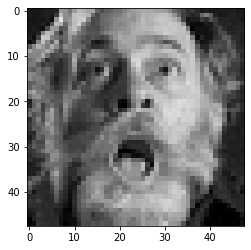

In [98]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [99]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml') 

In [100]:
gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [101]:
gray.shape

(48, 48)

In [102]:
faces =  faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame,(x,y),(x+w, y+h),(0,255,0),2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess)==0:
        print("Face Not Detected")
    else:
        for(ex,ey,ew,eh) in facess:
            roi = roi_color[ey: ey+eh, ex:ex + ew]

In [103]:
#roi

In [104]:
new=(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

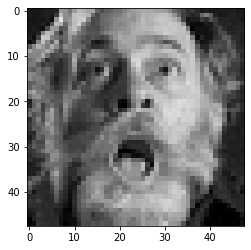

In [105]:
plt.imshow(new)

In [106]:
#plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))

In [107]:
final= cv2.resize(roi,(224,224))
final= np.expand_dims(final,axis=0)
final=final/255.0

In [109]:
newmodel.evaluate(x,y)

898/898 [==============================] - 659s 722ms/step - loss: 0.9238 - accuracy: 0.6810


[0.9238482713699341, 0.6810407638549805]

In [54]:
predict = newmodel.predict(final)

1/1 [==============================] - 0s 39ms/step


In [55]:
predict[0]

array([0.1638018 , 0.06684809, 0.27407768, 0.14432245, 0.06773048,
       0.11317062, 0.17004882], dtype=float32)

In [56]:
if np.argmax(predict)==0:
    print("Angry")
elif np.argmax(predict)==1:
    print("Disgust")
elif np.argmax(predict)==2:
    print("Fear")
elif np.argmax(predict)==3:
    print("Happy")
elif np.argmax(predict)==4:
    print("Neutral")
elif np.argmax(predict)==5:
    print("Sad")
elif np.argmax(predict)==6:
    print("Surprise")
else:
    print("Neutral")

Fear


In [57]:
np.argmax(predict)

2

# CAMERA Try 

In [ ]:
import cv2
path = "haarcascade_frontalface_default.xml"
font_scale=1.5
font=cv2.FONT_HERSHEY_PLAIN

rect_bgr=(255,255,255)
img=np.zeros((500,500))

text="Some Text In A Box!"
(text_width,text_height) = cv2.getTextSize(text,font,fontScale = font_scale, thickness=1)[0]
text_offset_x = 10
text_offset_y= img.shape[0]-25
box_coord=((text_offset_x,text_offset_y),(text_offset_x+text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(img,box_coord[0],box_coord[1],rect_bgr,cv2.FILLED)
cv2.putText(img,text,(text_offset_x,text_offset_y),font,fontScale = font_scale,color=(0,0,0),thickness=1)

cap=cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise  IOError("Cannot open cam")
    
while True:
    ret,img=cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces =  faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        cv2.rectangle(img,(x,y),(x+w, y+h),(0,255,0),2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess)==0:
            print("Face Not Detected")
        else:
            for(ex,ey,ew,eh) in facess:
                roi = roi_color[ey: ey+eh, ex:ex + ew]

    final= cv2.resize(roi, (224,224))
    final= np.expand_dims(final,axis=0)
    final=final/255.0

    font=cv2.FONT_HERSHEY_SIMPLEX
    
    predict=newmodel.predict(final)
    
    font_scale=1.5
    font=cv2.FONT_HERSHEY_PLAIN
    
    if (np.argmax(predict)==0):
        status="Angry"
        
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(img,(x1,x1),(x1 + w1,y1 + h1),(0,0,0),-1)
        cv2.putText(img,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
        cv2.putText(img,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255))
        
    elif (np.argmax(predict)==0):
        status="Happy"
        
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(img,(x1,x1),(x1 + w1,y1 + h1),(0,0,0),-1)
        cv2.putText(img,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
        cv2.putText(img,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255))
        
    elif (np.argmax(predict)==0):
        status="Surprise"
        
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(img,(x1,x1),(x1 + w1,y1 + h1),(0,0,0),-1)
        cv2.putText(img,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
        cv2.putText(img,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255))
        
    elif (np.argmax(predict)==0):
        status="Angry"
        
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(img,(x1,x1),(x1 + w1,y1 + h1),(0,0,0),-1)
        cv2.putText(img,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
        cv2.putText(img,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255))
    else:
        status="Neutral"
        
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(img,(x1,x1),(x1 + w1,y1 + h1),(0,0,0),-1)
        cv2.putText(img,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
        cv2.putText(img,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255))
    
    cv2.imshow("Face Emotion Recognition",img)
    if cv2.waitKey(2)& 0xFF== ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 36ms/step
Face Not Detected
1/1 [==============================] - 0s 36ms/step
Face Not Detected
Face Not Detected
1/1 [==============================] - 0s 37ms/step
Face Not Detected
1/1 [==============================] - 0s 36ms/step
Face Not Detected
1/1 [==============================] - 0s 41ms/step
Face Not Detected
1/1 [==============================] - 0s 41ms/step
Face Not Detected
1/1 [==============================] - 0s 36ms/step
Face Not Detected
1/1 [==============================] - 0s 35ms/step
Face Not Detected
1/1 [==============================] - 0s 34ms/step
Face Not Detected
1/1 [==============================] - 0s 36ms/step
Face Not Detected
1/1 [==============================] - 0s 38ms/step
Face Not Detected
1/1 [==============================] - 0s 40ms/step
Face Not Detected
1/1 [==============================] - 0s 35ms/step


In [4]:
import cv2
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)

while True:
    ret,img = cap.read()
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    
    for (x, y, w, h) in faces:
        cv2.rectangle(img,(x,y), (x+w, y+h),(255, 0, 0),2)
        
    cv2.imshow('img', img)
    
    k = cv2.waitKey(30) & 0xff
    
    if k==27:
        break
cap.release()


KeyboardInterrupt: 

In [20]:
final= cv2.resize(roi, (224,224))
    final= np.expand_dims(final,axis=0)
    final=final/255.0
    
    font=cv2.FONT_HERSHEY_SIMPLEX
    
    predict=newmodel.predict(final)
    
    font_scale=1.5
    font=cv2.FONT_HERSHEY_PLAIN
    
    if (np.argmax(predict)==0):
        status="Angry"
        
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1 + w1,y1 + h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
        
    elif (np.argmax(predict)==0):
        status="Happy"
        
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1 + w1,y1 + h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
        
    elif (np.argmax(predict)==0):
        status="Surprise"
        
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1 + w1,y1 + h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
        
    elif (np.argmax(predict)==0):
        status="Angry"
        
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1 + w1,y1 + h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    else:
        status="Neutral"
        
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1 + w1,y1 + h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    
    cv2.imshow("Face Emotion Recognition",frame)
    if cv2.waitKey(2)& 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

IndentationError: unexpected indent (3544386629.py, line 2)